<a href="https://colab.research.google.com/github/softconrob/KRGM/blob/main/data_preparation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Coding Response Instructions**

Your PDF submission of your team’s Jupyter Notebook should be structured similarly to that of A3, and cover the entire
data preprocessing, wrangling, and modeling process, including:

* Your team name, and the names of all of your group members ✅

* Provide a link to your group’s Gitlab or Github repository (mandatory) ✅

* A brief (1-2 sentence) statement of how each team member contributed to your progress in completing G2 (0.5
points) ✅

* A reminder of your tool’s task list. Please ensure this matches the list you provide in your video! ✅

* A clear and complete characterization of your data, including: ✅

  * Information on each (relevant) attribute/feature’s data type and distribution of values (0.5 points) ✅

  * Information of each (relevant) attribute/feature’s data quality: amount of missing values, presence of extreme
values/outliers, consistency, validity (see L08 slides) (0.5 points) ✅

  * Information on your goals: what do you need to visualize and model with this data? What will it take to prepare your data for those goals? (100-150 words) (1 point) ✅

* Clear and successful implementation of your data preparation goals, including:

  * Visualizations to appropriately and clearly present the data wrangling progress and results (3 points) ✅

  * Visualizations to appropriately and clearly present the data modeling results, with a brief description of significant insights (100-150 words) (3 points) ✅

* A reflection on how well your your data wrangling and modeling decisions  support your tasks, with discussion on what you could refine to better support them (100-150 words) (1.5 points)  ✅




**Team KRGM:**
* Kei Murakami
* Robin Meister
* Guojun Wu
* Md Rezuanul Haque


**Github repository:**
*   https://github.com/softconrob/KRGM/


**Team member contribution:**
*   Kei: Helped on the connection from backend and frontend and supported other team members in the frontend, backend and data preparation.
*   Robin: Did the data preparation incl. the preprocessing, wrangling and modelling.
*   Guojun: Implemented the frontend.
*   Rezuanul: Implemented the backend.

**Our tool's task list:**
*   Identify: Identify top-performing players based on performance statistics.
*   Compare: Compare player attributes across players and genders.
*   Recommend (not according to Munzer's VAD): Recommend potential player swaps or additions of similar players to optimize the team performance.

**Data Characterization:**

Luckily the data is already pretty clean. We do not have any values not fitting on our scale for the numerical attributes. Missing values, attribute data types, max and min values and distributions will be shown in further below in the code.

To visualize the data in our tool, we will for sure need the attributes or a summarization, like a mean, of the continuous numerical attributes that describe the players. Those attribute will be key for our tasks. Optionally, we can use categorical attributes to further distinguish the players. Also optionally, we can use images representing the player's face or nationality. To be able to use that data we have to make sure that there is no missing data, and if there is we need to find the right way to fill that missing data. Also we need to make sure that all the values of the attributes make sense and are not a mistake or impossible.

**Description of Data Modelling Results:**

For our data modelling part, we explored two approaches: clustering and nearest neighbor analysis. The clustering approach grouped pure strikers (an example) into three distinct groups based on their attributes, revealing interesting patterns. Cluster 0 represents medium-rated players, Cluster 1 consists of the top-rated strikers, and Cluster 2 includes those with lower ratings. To our surprise, physical attributes like pace and movement did not follow the pattern of low-medium-top tier clusters. The nearest neighbor approach on the other hand provided more personalized insights. By using this model we could identify the most similar players to a given player, based on their attributes. This highlights how players can be compared across several attributes, offering a nuanced view of player similarities. For example, despite being a top-rated player, Messi's nearest neighbors were not always the highest rated players, indicating that attributes beyond the overall ratings play a significant role in determining similarity.


**Reflection:**

We paid attention to prepare the data well to support our tool's tasks. By cleaning the data, selecting only the relevant columns and filling missing values and also merging the male and female player datasets, we enabled the comparison and identification accross genders and players and also set the foundation for our recommendation model. We summarized attributes of the same category like the 'attacking' feature, which helps and is critical to identify top performing players. However, here there is room for improvement. The wrangling process could be further refined by taking more granular performance metrics, and not summarizing them, which would allow for a more nuanced analysis of players and potential player swaps. Additionally, integrating also the ratings of the not main position of a player could help coaches further refine and expand their teams and maybe optimize team performance by playing a good player on her/his secondary position. Our data modelling focused on player swaps and possibly help with recommendation on a player level. We could adapt this to be on a team based level, which would enable more refined recommendations for player swaps that not only replace a player but could also possibly improve the full team performance.




In [ ]:
# imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns

In [ ]:
%matplotlib inline

# Data Loading and Attribute Selection

In [ ]:
# connection to drive to load the datasets
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
path_to_male_fifa = '/content/drive/My Drive/UZH/IVDA/players_22.csv'
path_to_female_fifa = '/content/drive/My Drive/UZH/IVDA/female_players_22.csv'

male_fifa_data = pd.read_csv(path_to_male_fifa)
female_fifa_data = pd.read_csv(path_to_female_fifa)

# adding a gender column
male_fifa_data['gender'] = 'male'
female_fifa_data['gender'] = 'female'

# checking the first few rows of the datasets
print("Male FIFA Dataset:")
print(male_fifa_data.head(3))

print("\nFemale FIFA Dataset:")
print(female_fifa_data.head(3))

Male FIFA Dataset:
   sofifa_id                                         player_url  \
0     158023  https://sofifa.com/player/158023/lionel-messi/...   
1     188545  https://sofifa.com/player/188545/robert-lewand...   
2      20801  https://sofifa.com/player/20801/c-ronaldo-dos-...   

          short_name                            long_name player_positions  \
0           L. Messi       Lionel Andrés Messi Cuccittini       RW, ST, CF   
1     R. Lewandowski                   Robert Lewandowski               ST   
2  Cristiano Ronaldo  Cristiano Ronaldo dos Santos Aveiro           ST, LW   

   overall  potential    value_eur  wage_eur  age  ...    cb   rcb    rb  \
0       93         93   78000000.0  320000.0   34  ...  50+3  50+3  61+3   
1       92         92  119500000.0  270000.0   32  ...  60+3  60+3  61+3   
2       91         91   45000000.0  270000.0   36  ...  53+3  53+3  60+3   

     gk                                    player_face_url  \
0  19+3  https://cdn.sofifa.net/

<ipython-input-46-29d44705520a>:4: DtypeWarning: Columns (25,108) have mixed types. Specify dtype option on import or set low_memory=False.
  male_fifa_data = pd.read_csv(path_to_male_fifa)


In [ ]:
# display the shape of the two datasets
#print(male_fifa_data.columns)
print(male_fifa_data.shape)
num_rows = len(male_fifa_data)
print("Number of rows for the male dataset:", num_rows)


#print(female_fifa_data.columns)
print(female_fifa_data.shape)
num_rows = len(female_fifa_data)
print("Number of rows for the female dataset:", num_rows)



(19239, 111)
Number of rows for the male dataset: 19239
(391, 111)
Number of rows for the female dataset: 391


In [ ]:
# printing the amount of missing values for the club_name column in the female player dataset
missing_values_in_column = female_fifa_data['club_name'].isna().sum()
print(f"Missing values in column '{'club_name'}': {missing_values_in_column}")


Missing values in column 'club_name': 391


Since the female dataset does not contain any information regarding the clubs and also only contains 391 values, we decided to keep all female players for the moment. The male players will be filtered so that only male players from the 5 top leagues are being kept.

In [ ]:
# filtering male dataset to only keep players from the 5 top leagues
top_leagues = ['French Ligue 1', 'German 1. Bundesliga', 'English Premier League', 'Spain Primera Division', 'Italian Serie A']
filtered_male = male_fifa_data[male_fifa_data['league_name'].isin(top_leagues)]

num_rows = len(filtered_male)
print("Number of rows for the filtered male dataset:", num_rows)

Number of rows for the filtered male dataset: 2976


Now that we have all our players of interest, we can select the relevant columns and begin with the real data preprocessing and wrangling. Since we only kept (male) players from the top 5 leagues and all female players, to simplify our dataset we will no longer select the specific club a player plays for and only keep the national team. Later on if needed we can easily add that back since we always keep the sofifa_id which is a unique identifier for each player.

In [ ]:
# selecting the relevant columns including the player attributes and links to images:
relevant_columns = ['sofifa_id', 'player_url', 'short_name', 'player_positions',
                    'overall', 'age', 'gender', 'nationality_name','pace','shooting','passing',
                    'dribbling','defending','physic','attacking_crossing',
                    'attacking_finishing','attacking_heading_accuracy',
                    'attacking_short_passing','attacking_volleys','skill_dribbling',
                    'skill_curve','skill_fk_accuracy','skill_long_passing',
                    'skill_ball_control','movement_acceleration','movement_sprint_speed',
                    'movement_agility', 'movement_reactions', 'movement_balance',
                    'power_shot_power', 'power_jumping','power_stamina','power_strength',
                    'power_long_shots','mentality_aggression','mentality_interceptions',
                    'mentality_positioning','mentality_vision','mentality_penalties',
                    'mentality_composure','defending_marking_awareness','defending_standing_tackle',
                    'defending_sliding_tackle','goalkeeping_diving','goalkeeping_handling',
                    'goalkeeping_kicking','goalkeeping_positioning','goalkeeping_reflexes',
                    'goalkeeping_speed','player_face_url', 'nation_flag_url']
df_male = filtered_male[relevant_columns]
df_female = female_fifa_data[relevant_columns]

# Data Preprocessing and Wrangling

## General Description

Lets have a look first at all the different attribute types we are left with.

In [ ]:
# lets have a look at all column types for the male player dataset:
for column in df_male.columns:
    print(f"Column: {column}, Type: {df_male[column].dtype}")


Column: sofifa_id, Type: int64
Column: player_url, Type: object
Column: short_name, Type: object
Column: player_positions, Type: object
Column: overall, Type: int64
Column: age, Type: int64
Column: gender, Type: object
Column: nationality_name, Type: object
Column: pace, Type: float64
Column: shooting, Type: float64
Column: passing, Type: float64
Column: dribbling, Type: float64
Column: defending, Type: float64
Column: physic, Type: float64
Column: attacking_crossing, Type: int64
Column: attacking_finishing, Type: int64
Column: attacking_heading_accuracy, Type: int64
Column: attacking_short_passing, Type: int64
Column: attacking_volleys, Type: int64
Column: skill_dribbling, Type: int64
Column: skill_curve, Type: int64
Column: skill_fk_accuracy, Type: int64
Column: skill_long_passing, Type: int64
Column: skill_ball_control, Type: int64
Column: movement_acceleration, Type: int64
Column: movement_sprint_speed, Type: int64
Column: movement_agility, Type: int64
Column: movement_reactions, T

In [ ]:
# lets have a look at all column types for the female player dataset:
for column in df_female.columns:
    print(f"Column: {column}, Type: {df_female[column].dtype}")

Column: sofifa_id, Type: int64
Column: player_url, Type: object
Column: short_name, Type: object
Column: player_positions, Type: object
Column: overall, Type: int64
Column: age, Type: int64
Column: gender, Type: object
Column: nationality_name, Type: object
Column: pace, Type: float64
Column: shooting, Type: float64
Column: passing, Type: float64
Column: dribbling, Type: float64
Column: defending, Type: float64
Column: physic, Type: float64
Column: attacking_crossing, Type: int64
Column: attacking_finishing, Type: int64
Column: attacking_heading_accuracy, Type: int64
Column: attacking_short_passing, Type: int64
Column: attacking_volleys, Type: int64
Column: skill_dribbling, Type: int64
Column: skill_curve, Type: int64
Column: skill_fk_accuracy, Type: int64
Column: skill_long_passing, Type: int64
Column: skill_ball_control, Type: int64
Column: movement_acceleration, Type: int64
Column: movement_sprint_speed, Type: int64
Column: movement_agility, Type: int64
Column: movement_reactions, T

For all our numerical attributes, we will check the min and max value. And we can see, as expected, that values are distributed from 1-99. Except the sofifa_id.

In [ ]:
# selecting only numerical columns (integers and floats) for the male player dataset
numerical_df = df_male.select_dtypes(include=['int64', 'float64'])

# Printing max and min values for each numerical column
for column in numerical_df.columns:
    max_value = numerical_df[column].max()
    min_value = numerical_df[column].min()
    print(f"Column: {column}, Max: {max_value}, Min: {min_value}")


Column: sofifa_id, Max: 264590, Min: 18122
Column: overall, Max: 93, Min: 51
Column: age, Max: 40, Min: 16
Column: pace, Max: 97.0, Min: 32.0
Column: shooting, Max: 94.0, Min: 18.0
Column: passing, Max: 93.0, Min: 31.0
Column: dribbling, Max: 95.0, Min: 35.0
Column: defending, Max: 91.0, Min: 17.0
Column: physic, Max: 90.0, Min: 32.0
Column: attacking_crossing, Max: 94, Min: 7
Column: attacking_finishing, Max: 95, Min: 4
Column: attacking_heading_accuracy, Max: 93, Min: 5
Column: attacking_short_passing, Max: 94, Min: 12
Column: attacking_volleys, Max: 90, Min: 4
Column: skill_dribbling, Max: 96, Min: 5
Column: skill_curve, Max: 93, Min: 6
Column: skill_fk_accuracy, Max: 94, Min: 4
Column: skill_long_passing, Max: 93, Min: 12
Column: skill_ball_control, Max: 96, Min: 9
Column: movement_acceleration, Max: 97, Min: 15
Column: movement_sprint_speed, Max: 97, Min: 15
Column: movement_agility, Max: 96, Min: 21
Column: movement_reactions, Max: 94, Min: 30
Column: movement_balance, Max: 96, M

In [ ]:
# selecting only numerical columns (integers and floats) for the female player dataset
numerical_df = df_female.select_dtypes(include=['int64', 'float64'])

# Printing max and min values for each numerical column
for column in numerical_df.columns:
    max_value = numerical_df[column].max()
    min_value = numerical_df[column].min()
    print(f"Column: {column}, Max: {max_value}, Min: {min_value}")

Column: sofifa_id, Max: 264630, Min: 226177
Column: overall, Max: 92, Min: 60
Column: age, Max: 38, Min: 18
Column: pace, Max: 94.0, Min: 37.0
Column: shooting, Max: 93.0, Min: 23.0
Column: passing, Max: 90.0, Min: 38.0
Column: dribbling, Max: 93.0, Min: 40.0
Column: defending, Max: 91.0, Min: 16.0
Column: physic, Max: 88.0, Min: 38.0
Column: attacking_crossing, Max: 93, Min: 8
Column: attacking_finishing, Max: 95, Min: 5
Column: attacking_heading_accuracy, Max: 94, Min: 9
Column: attacking_short_passing, Max: 92, Min: 16
Column: attacking_volleys, Max: 90, Min: 5
Column: skill_dribbling, Max: 95, Min: 5
Column: skill_curve, Max: 93, Min: 10
Column: skill_fk_accuracy, Max: 94, Min: 10
Column: skill_long_passing, Max: 89, Min: 16
Column: skill_ball_control, Max: 94, Min: 9
Column: movement_acceleration, Max: 95, Min: 15
Column: movement_sprint_speed, Max: 94, Min: 16
Column: movement_agility, Max: 93, Min: 21
Column: movement_reactions, Max: 93, Min: 38
Column: movement_balance, Max: 98

## Missing Values and Simplification of Attributes

Now since we are still left with quite a few attributes, to further simplify our datasets to be able to use it for our tool, we will summarize all attributes from the same category. A category can easily be seen by looking the prefix of the numerical player attributes. That prefix is also the name of the category. We will create a new column for each category, which will get as a value the average of all of the attributes beloning to that category rounded to an integer. We have already seen that there are no values go out of the 1-99 range, so the next thing we have to check are missing values before we can summarize our categories.

In [ ]:
# missing values for the male dataset:
missing_values = df_male.isna().sum()

# printing the count of missing values for each column
print("Missing Values in Each Column:")
print(missing_values)


Missing Values in Each Column:
sofifa_id                         0
player_url                        0
short_name                        0
player_positions                  0
overall                           0
age                               0
gender                            0
nationality_name                  0
pace                            326
shooting                        326
passing                         326
dribbling                       326
defending                       326
physic                          326
attacking_crossing                0
attacking_finishing               0
attacking_heading_accuracy        0
attacking_short_passing           0
attacking_volleys                 0
skill_dribbling                   0
skill_curve                       0
skill_fk_accuracy                 0
skill_long_passing                0
skill_ball_control                0
movement_acceleration             0
movement_sprint_speed             0
movement_agility                 

Even though the dataset is already very clean, we still have some missing values. Interestingly when summing the 2 different values that appear in the missing values 326+2650 we get 2976, which corresponds to the amount of total rows. This leads us to think, that maybe the goalkeepers do not have any values for the player statistics above, while all players on the field do not have a value for the goalkeeping_speed. We will then continue to inspect the data further and prove/disprove our theory.

In [ ]:
# filtering the male dataset where 'goalkeeping_speed' is missing and then selecting distinct 'player_positions'
distinct_player_positions = df_male[df_male['goalkeeping_speed'].isna()]['player_positions'].unique()
# lets see if it contains a goalkeeper
contains_gk = any('GK' in position for position in distinct_player_positions)
print("goalkeeping_speed contains 'GK':", contains_gk)

# filtering the male dataset where 'pace' is missing and then selecting distinct 'player_positions'
distinct_player_positions = df_male[df_male['pace'].isna()]['player_positions'].unique()
# printing the distinct values
print("Distinct Player Positions where pace is NaN:", distinct_player_positions)

# filtering the male dataset where 'shooting' is missing and then selecting distinct 'player_positions'
distinct_player_positions = df_male[df_male['shooting'].isna()]['player_positions'].unique()
# printing the distinct values
print("Distinct Player Positions where shooting is NaN:", distinct_player_positions)

# filtering the male dataset where 'passing' is missing and then selecting distinct 'player_positions'
distinct_player_positions = df_male[df_male['passing'].isna()]['player_positions'].unique()
# printing the distinct values
print("Distinct Player Positions where passing is NaN:", distinct_player_positions)

# filtering the male dataset where 'dribbling' is missing and then selecting distinct 'player_positions'
distinct_player_positions = df_male[df_male['dribbling'].isna()]['player_positions'].unique()
# printing the distinct values
print("Distinct Player Positions where dribbling is NaN:", distinct_player_positions)

# filtering the male dataset where 'defending' is missing and then selecting distinct 'player_positions'
distinct_player_positions = df_male[df_male['defending'].isna()]['player_positions'].unique()
# printing the distinct values
print("Distinct Player Positions where defending is NaN:", distinct_player_positions)

# filtering the male dataset where 'physic' is missing and then selecting distinct 'player_positions'
distinct_player_positions = df_male[df_male['physic'].isna()]['player_positions'].unique()
# printing the distinct values
print("Distinct Player Positions where physic is NaN:", distinct_player_positions)


goalkeeping_speed contains 'GK': False
Distinct Player Positions where pace is NaN: ['GK']
Distinct Player Positions where shooting is NaN: ['GK']
Distinct Player Positions where passing is NaN: ['GK']
Distinct Player Positions where dribbling is NaN: ['GK']
Distinct Player Positions where defending is NaN: ['GK']
Distinct Player Positions where physic is NaN: ['GK']


As expected for the goalkeeping_speed there is not a single goalkeeper listed with missing values. On the other hand for the player attributes: pace, shooting, passing, dribbling, defending and physic, only GKs are listed.

Now since those values are missing we have to fill them. We decide to fill them with 1s since it seems that the player does not have this specific skill, so we will give him the minimum number for it on our scale from 1-99.

In [ ]:
# fill the missing values in the male dataset with 1s:
columns_to_fill = ['goalkeeping_speed', 'pace', 'shooting', 'passing', 'dribbling', 'defending', 'physic']
df_male[columns_to_fill] = df_male[columns_to_fill].fillna(1)

# to be sure we print missing values for the male dataset again:
missing_values = df_male.isna().sum()
print("Missing Values in Each Column:")
print(missing_values)

Missing Values in Each Column:
sofifa_id                      0
player_url                     0
short_name                     0
player_positions               0
overall                        0
age                            0
gender                         0
nationality_name               0
pace                           0
shooting                       0
passing                        0
dribbling                      0
defending                      0
physic                         0
attacking_crossing             0
attacking_finishing            0
attacking_heading_accuracy     0
attacking_short_passing        0
attacking_volleys              0
skill_dribbling                0
skill_curve                    0
skill_fk_accuracy              0
skill_long_passing             0
skill_ball_control             0
movement_acceleration          0
movement_sprint_speed          0
movement_agility               0
movement_reactions             0
movement_balance               0
power_shot_p

<ipython-input-57-593dc9353e2e>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_male[columns_to_fill] = df_male[columns_to_fill].fillna(1)


We can now proceed and create our new attributes as the average of the attributes in that category.

In [ ]:
# list of columns to calculate the mean of attacking
columns_for_mean = ['attacking_crossing', 'attacking_finishing', 'attacking_heading_accuracy', 'attacking_short_passing', 'attacking_volleys']
# creating a new column 'attacking' which is the mean of the specified columns
df_male['attacking'] = df_male[columns_for_mean].mean(axis=1).astype(int)
# dropping the not anymore needed columns
df_male = df_male.drop(columns=columns_for_mean)

# list of columns to calculate the mean of skill
columns_for_mean = ['skill_dribbling', 'skill_curve', 'skill_fk_accuracy', 'skill_long_passing', 'skill_ball_control']
# creating a new column 'skill' which is the mean of the specified columns
df_male['skill'] = df_male[columns_for_mean].mean(axis=1).astype(int)
# dropping the not anymore needed columns
df_male = df_male.drop(columns=columns_for_mean)

# list of columns to calculate the mean of movement
columns_for_mean = ['movement_acceleration', 'movement_sprint_speed', 'movement_agility', 'movement_reactions', 'movement_balance']
# creating a new column 'movement' which is the mean of the specified columns
df_male['movement'] = df_male[columns_for_mean].mean(axis=1).astype(int)
# dropping the not anymore needed columns
df_male = df_male.drop(columns=columns_for_mean)

# list of columns to calculate the mean of power
columns_for_mean = ['power_shot_power', 'power_jumping', 'power_stamina', 'power_strength', 'power_long_shots']
# creating a new column 'power' which is the mean of the specified columns
df_male['power'] = df_male[columns_for_mean].mean(axis=1).astype(int)
# dropping the not anymore needed columns
df_male = df_male.drop(columns=columns_for_mean)

# list of columns to calculate the mean of mentality
columns_for_mean = ['mentality_aggression', 'mentality_interceptions', 'mentality_positioning', 'mentality_vision', 'mentality_penalties', 'mentality_composure']
# creating a new column 'mentality' which is the mean of the specified columns
df_male['mentality'] = df_male[columns_for_mean].mean(axis=1).astype(int)
# dropping the not anymore needed columns
df_male = df_male.drop(columns=columns_for_mean)

# list of columns to calculate the mean of defending
columns_for_mean = ['defending_marking_awareness', 'defending_standing_tackle', 'defending_sliding_tackle']
# creating a new column 'defending' which is the mean of the specified columns
df_male['defending'] = df_male[columns_for_mean].mean(axis=1).astype(int)
# dropping the not anymore needed columns
df_male = df_male.drop(columns=columns_for_mean)

# list of columns to calculate the mean of goalkeeping
columns_for_mean = ['goalkeeping_diving', 'goalkeeping_handling', 'goalkeeping_kicking', 'goalkeeping_positioning', 'goalkeeping_reflexes', 'goalkeeping_speed']
# creating a new column 'goalkeeping' which is the mean of the specified columns
df_male['goalkeeping'] = df_male[columns_for_mean].mean(axis=1).astype(int)
# dropping the not anymore needed columns
df_male = df_male.drop(columns=columns_for_mean)


<ipython-input-58-efcc04e5b84c>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_male['attacking'] = df_male[columns_for_mean].mean(axis=1).astype(int)


Now we do the same for the female player dataset.

In [ ]:
# missing values for the female dataset:
missing_values = df_female.isna().sum()

# printing the count of missing values for each column
print("Missing Values in Each Column:")
print(missing_values)


Missing Values in Each Column:
sofifa_id                        0
player_url                       0
short_name                       0
player_positions                 0
overall                          0
age                              0
gender                           0
nationality_name                 0
pace                            48
shooting                        48
passing                         48
dribbling                       48
defending                       48
physic                          48
attacking_crossing               0
attacking_finishing              0
attacking_heading_accuracy       0
attacking_short_passing          0
attacking_volleys                0
skill_dribbling                  0
skill_curve                      0
skill_fk_accuracy                0
skill_long_passing               0
skill_ball_control               0
movement_acceleration            0
movement_sprint_speed            0
movement_agility                 0
movement_reactions      

In [ ]:
# filtering the female dataset where 'goalkeeping_speed' is missing and then selecting distinct 'player_positions'
distinct_player_positions = df_female[df_female['goalkeeping_speed'].isna()]['player_positions'].unique()
# lets see if it contains a goalkeeper
contains_gk = any('GK' in position for position in distinct_player_positions)
print("goalkeeping_speed contains 'GK':", contains_gk)

# filtering the female dataset where 'pace' is missing and then selecting distinct 'player_positions'
distinct_player_positions = df_female[df_female['pace'].isna()]['player_positions'].unique()
# printing the distinct values
print("Distinct Player Positions where pace is NaN:", distinct_player_positions)

# filtering the female dataset where 'shooting' is missing and then selecting distinct 'player_positions'
distinct_player_positions = df_female[df_female['shooting'].isna()]['player_positions'].unique()
# printing the distinct values
print("Distinct Player Positions where shooting is NaN:", distinct_player_positions)

# filtering the female dataset where 'passing' is missing and then selecting distinct 'player_positions'
distinct_player_positions = df_female[df_female['passing'].isna()]['player_positions'].unique()
# printing the distinct values
print("Distinct Player Positions where passing is NaN:", distinct_player_positions)

# filtering the female dataset where 'dribbling' is missing and then selecting distinct 'player_positions'
distinct_player_positions = df_female[df_female['dribbling'].isna()]['player_positions'].unique()
# printing the distinct values
print("Distinct Player Positions where dribbling is NaN:", distinct_player_positions)

# filtering the female dataset where 'defending' is missing and then selecting distinct 'player_positions'
distinct_player_positions = df_female[df_female['defending'].isna()]['player_positions'].unique()
# printing the distinct values
print("Distinct Player Positions where defending is NaN:", distinct_player_positions)

# filtering the female dataset where 'physic' is missing and then selecting distinct 'player_positions'
distinct_player_positions = df_female[df_female['physic'].isna()]['player_positions'].unique()
# printing the distinct values
print("Distinct Player Positions where physic is NaN:", distinct_player_positions)


goalkeeping_speed contains 'GK': False
Distinct Player Positions where pace is NaN: ['GK']
Distinct Player Positions where shooting is NaN: ['GK']
Distinct Player Positions where passing is NaN: ['GK']
Distinct Player Positions where dribbling is NaN: ['GK']
Distinct Player Positions where defending is NaN: ['GK']
Distinct Player Positions where physic is NaN: ['GK']


In [ ]:
# fill the missing values in the female dataset with 1s:
columns_to_fill = ['goalkeeping_speed', 'pace', 'shooting', 'passing', 'dribbling', 'defending', 'physic']
df_female[columns_to_fill] = df_female[columns_to_fill].fillna(1)

# to be sure we print missing values for the female dataset again:
missing_values = df_female.isna().sum()
print("Missing Values in Each Column:")
print(missing_values)

Missing Values in Each Column:
sofifa_id                      0
player_url                     0
short_name                     0
player_positions               0
overall                        0
age                            0
gender                         0
nationality_name               0
pace                           0
shooting                       0
passing                        0
dribbling                      0
defending                      0
physic                         0
attacking_crossing             0
attacking_finishing            0
attacking_heading_accuracy     0
attacking_short_passing        0
attacking_volleys              0
skill_dribbling                0
skill_curve                    0
skill_fk_accuracy              0
skill_long_passing             0
skill_ball_control             0
movement_acceleration          0
movement_sprint_speed          0
movement_agility               0
movement_reactions             0
movement_balance               0
power_shot_p

<ipython-input-61-7ee9630b7224>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_female[columns_to_fill] = df_female[columns_to_fill].fillna(1)


In [ ]:
# list of columns to calculate the mean of attacking
columns_for_mean = ['attacking_crossing', 'attacking_finishing', 'attacking_heading_accuracy', 'attacking_short_passing', 'attacking_volleys']
# creating a new column 'attacking' which is the mean of the specified columns
df_female['attacking'] = df_female[columns_for_mean].mean(axis=1).astype(int)
# dropping the not anymore needed columns
df_female = df_female.drop(columns=columns_for_mean)

# list of columns to calculate the mean of skill
columns_for_mean = ['skill_dribbling', 'skill_curve', 'skill_fk_accuracy', 'skill_long_passing', 'skill_ball_control']
# creating a new column 'skill' which is the mean of the specified columns
df_female['skill'] = df_female[columns_for_mean].mean(axis=1).astype(int)
# dropping the not anymore needed columns
df_female = df_female.drop(columns=columns_for_mean)

# list of columns to calculate the mean of movement
columns_for_mean = ['movement_acceleration', 'movement_sprint_speed', 'movement_agility', 'movement_reactions', 'movement_balance']
# creating a new column 'movement' which is the mean of the specified columns
df_female['movement'] = df_female[columns_for_mean].mean(axis=1).astype(int)
# dropping the not anymore needed columns
df_female = df_female.drop(columns=columns_for_mean)

# list of columns to calculate the mean of power
columns_for_mean = ['power_shot_power', 'power_jumping', 'power_stamina', 'power_strength', 'power_long_shots']
# creating a new column 'power' which is the mean of the specified columns
df_female['power'] = df_female[columns_for_mean].mean(axis=1).astype(int)
# dropping the not anymore needed columns
df_female = df_female.drop(columns=columns_for_mean)

# list of columns to calculate the mean of mentality
columns_for_mean = ['mentality_aggression', 'mentality_interceptions', 'mentality_positioning', 'mentality_vision', 'mentality_penalties', 'mentality_composure']
# creating a new column 'mentality' which is the mean of the specified columns
df_female['mentality'] = df_female[columns_for_mean].mean(axis=1).astype(int)
# dropping the not anymore needed columns
df_female = df_female.drop(columns=columns_for_mean)

# list of columns to calculate the mean of defending
columns_for_mean = ['defending_marking_awareness', 'defending_standing_tackle', 'defending_sliding_tackle']
# creating a new column 'defending' which is the mean of the specified columns
df_female['defending'] = df_female[columns_for_mean].mean(axis=1).astype(int)
# dropping the not anymore needed columns
df_female = df_female.drop(columns=columns_for_mean)

# list of columns to calculate the mean of goalkeeping
columns_for_mean = ['goalkeeping_diving', 'goalkeeping_handling', 'goalkeeping_kicking', 'goalkeeping_positioning', 'goalkeeping_reflexes', 'goalkeeping_speed']
# creating a new column 'goalkeeping' which is the mean of the specified columns
df_female['goalkeeping'] = df_female[columns_for_mean].mean(axis=1).astype(int)
# dropping the not anymore needed columns
df_female = df_female.drop(columns=columns_for_mean)


<ipython-input-62-591695a30ad8>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_female['attacking'] = df_female[columns_for_mean].mean(axis=1).astype(int)


## Final Attribute Data Types and Distribution

The following code cell output shows the datatypes of our final attributes.

In [ ]:
# lets have a look at all column types for the male player dataset:
for column in df_male.columns:
    print(f"Column: {column}, Data Type: {df_male[column].dtype}")

Column: sofifa_id, Data Type: int64
Column: player_url, Data Type: object
Column: short_name, Data Type: object
Column: player_positions, Data Type: object
Column: overall, Data Type: int64
Column: age, Data Type: int64
Column: gender, Data Type: object
Column: nationality_name, Data Type: object
Column: pace, Data Type: float64
Column: shooting, Data Type: float64
Column: passing, Data Type: float64
Column: dribbling, Data Type: float64
Column: defending, Data Type: int64
Column: physic, Data Type: float64
Column: player_face_url, Data Type: object
Column: nation_flag_url, Data Type: object
Column: attacking, Data Type: int64
Column: skill, Data Type: int64
Column: movement, Data Type: int64
Column: power, Data Type: int64
Column: mentality, Data Type: int64
Column: goalkeeping, Data Type: int64


In [ ]:
# lets have a look at all column types for the female player dataset:
for column in df_female.columns:
    print(f"Column: {column}, Data Type: {df_female[column].dtype}")

Column: sofifa_id, Data Type: int64
Column: player_url, Data Type: object
Column: short_name, Data Type: object
Column: player_positions, Data Type: object
Column: overall, Data Type: int64
Column: age, Data Type: int64
Column: gender, Data Type: object
Column: nationality_name, Data Type: object
Column: pace, Data Type: float64
Column: shooting, Data Type: float64
Column: passing, Data Type: float64
Column: dribbling, Data Type: float64
Column: defending, Data Type: int64
Column: physic, Data Type: float64
Column: player_face_url, Data Type: object
Column: nation_flag_url, Data Type: object
Column: attacking, Data Type: int64
Column: skill, Data Type: int64
Column: movement, Data Type: int64
Column: power, Data Type: int64
Column: mentality, Data Type: int64
Column: goalkeeping, Data Type: int64


Our numerical columns will be mainly used for our tool's tasks, while the other columns help in describing and visualizing the players.

We will now, that the cleaning is done, merge the male and female player dataset together.

In [ ]:
# combining the male and female player dataset into 1
df_fifa = pd.concat([df_male, df_female], axis=0, ignore_index=True)

In [ ]:
# save the combined df as a csv file
path_to_save_csv = '/content/drive/My Drive/UZH/IVDA/df_fifa.csv'
df_fifa.to_csv(path_to_save_csv, index=False)

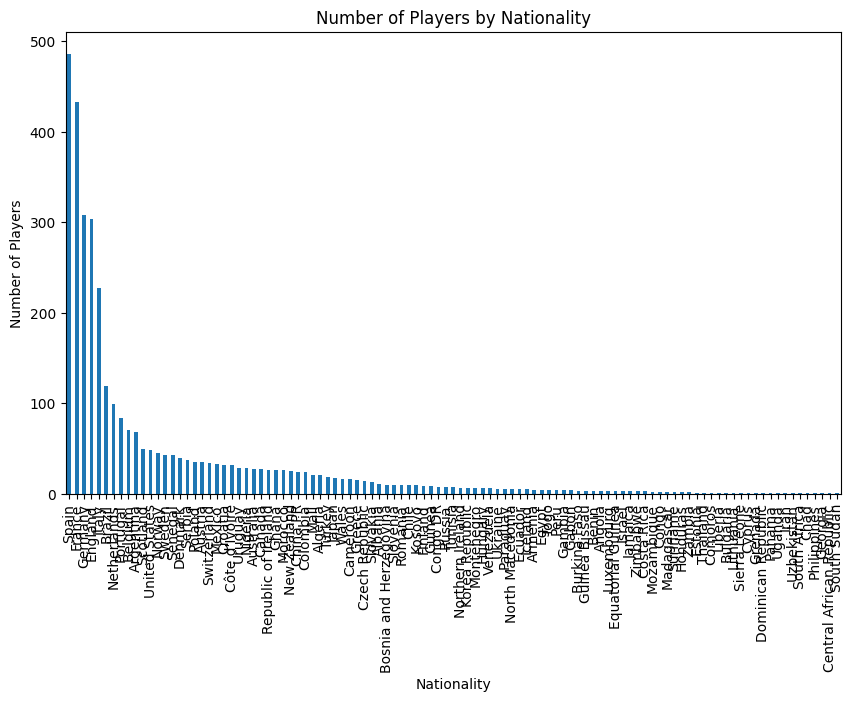

In [ ]:
# displaying the nationalities
# calculate the counts of each nationality
nationality_counts = df_fifa['nationality_name'].value_counts()

# plotting
nationality_counts.plot(kind='bar', figsize=(10, 6))
# labelling
plt.title('Number of Players by Nationality')
plt.xlabel('Nationality')
plt.ylabel('Number of Players')
plt.xticks(rotation=90)

plt.show()


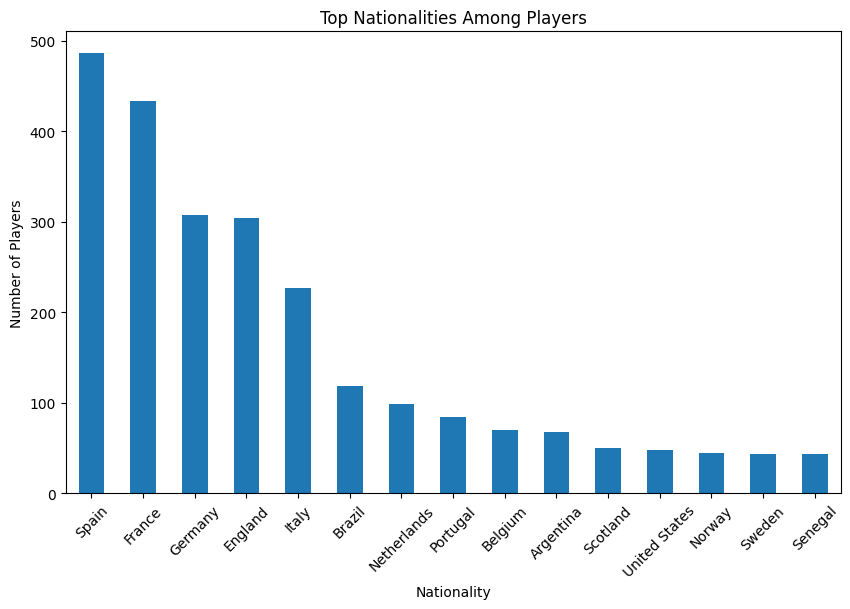

In [ ]:
# since its too crowded lets look at the top 15 countries
N = 15
top_nationalities = df_fifa['nationality_name'].value_counts().head(N)

top_nationalities.plot(kind='bar', figsize=(10, 6))
plt.title('Top Nationalities Among Players')
plt.xlabel('Nationality')
plt.ylabel('Number of Players')
plt.xticks(rotation=45)
plt.show()

We can see that Spain, France, Germany, England and Italy not only have the 5 top leagues, but also the most amount of players in the dataset. That makes sense since we expect in any league the highest amount of players should be from that nation since it is their home league, and must good football acadamies. Italy, with a top 5 league has only around half the amount of players left in our dataset than Spain, which could also argue that having a top 5 league in the country is not the only criteria on how many people play in a top 5 league.

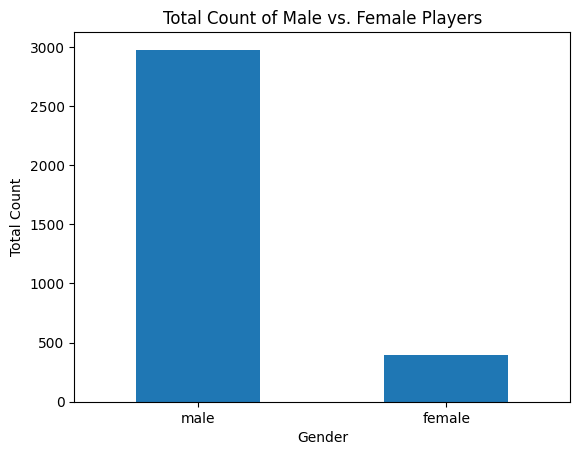

In [ ]:
# count the number of male and female players
gender_counts = df_fifa['gender'].value_counts()
gender_counts.plot(kind='bar')

# labelling
plt.title('Total Count of Male vs. Female Players')
plt.xlabel('Gender')
plt.ylabel('Total Count')
plt.xticks(rotation=0)
plt.show()


The amount of male players clearly dominates our final dataset. But how do male vs female players compare in their average overall rating?

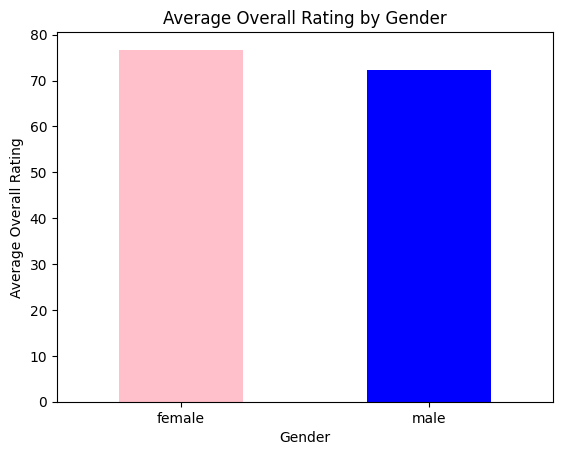

In [ ]:
# calculate the average 'overall_rating' by gender
average_ratings = df_fifa.groupby('gender')['overall'].mean()
average_ratings.plot(kind='bar', color=['pink', 'blue'])

# labelling
plt.title('Average Overall Rating by Gender')
plt.xlabel('Gender')
plt.ylabel('Average Overall Rating')
plt.xticks(rotation=0)
plt.show()


The overall rating looks pretty balanced, with the female one being slighlty above the male one.

We now plot the distribution for our numerical attributes, for both male and female players and also for the combined data. This also helps us to double check that nothing got forgotten in the data cleaning.

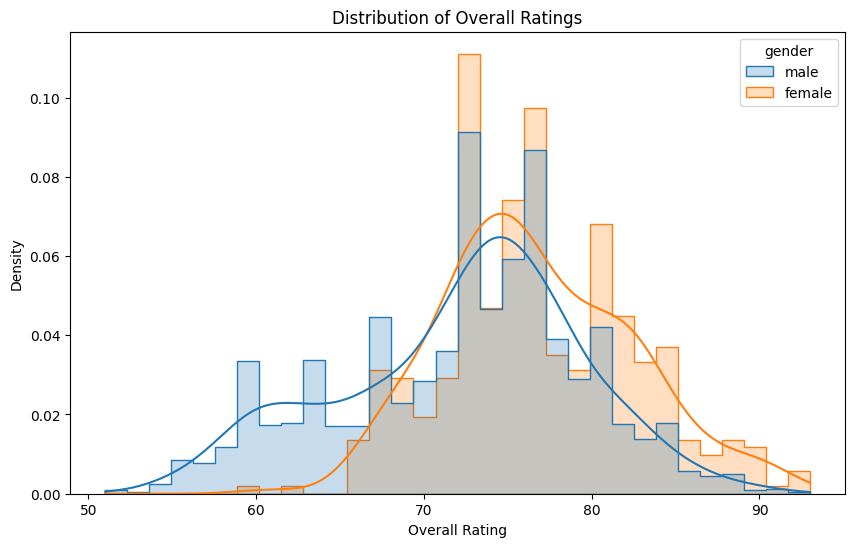

In [ ]:
# distribution for overall
plt.figure(figsize=(10, 6))
sns.histplot(data=df_fifa, x='overall', hue='gender', kde=True, element='step', stat="density", common_norm=False)
plt.title('Distribution of Overall Ratings')
plt.xlabel('Overall Rating')
plt.ylabel('Density')
plt.show()


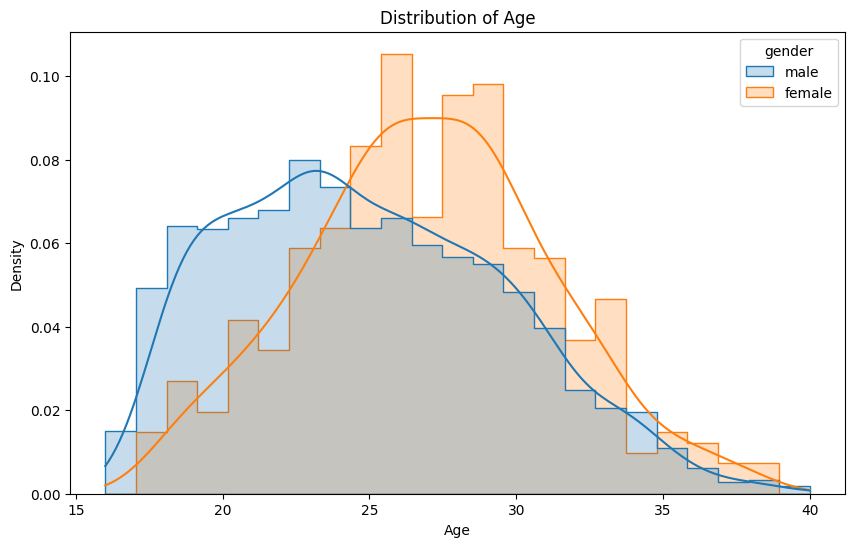

In [ ]:
# distribution for age
plt.figure(figsize=(10, 6))
sns.histplot(data=df_fifa, x='age', hue='gender', kde=True, element='step', stat="density", common_norm=False)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Density')
plt.show()

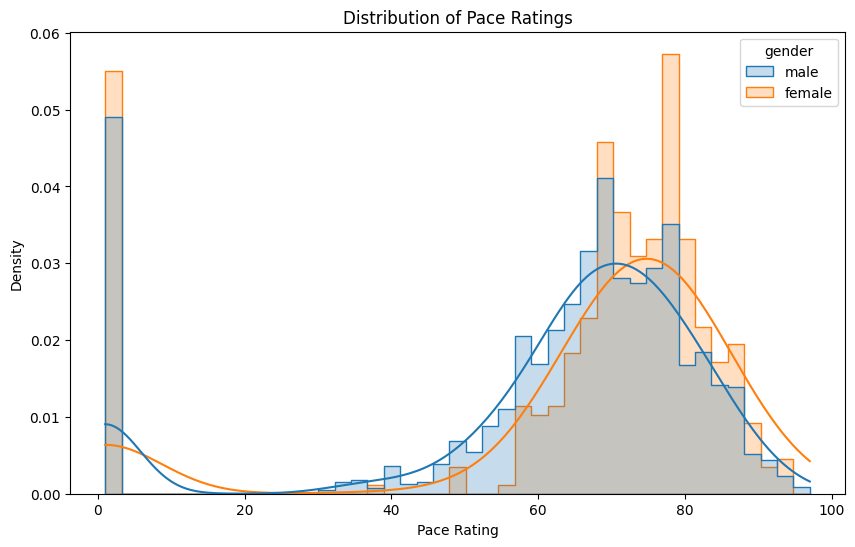

In [ ]:
# distribution for pace
plt.figure(figsize=(10, 6))
sns.histplot(data=df_fifa, x='pace', hue='gender', kde=True, element='step', stat="density", common_norm=False)
plt.title('Distribution of Pace Ratings')
plt.xlabel('Pace Rating')
plt.ylabel('Density')
plt.show()

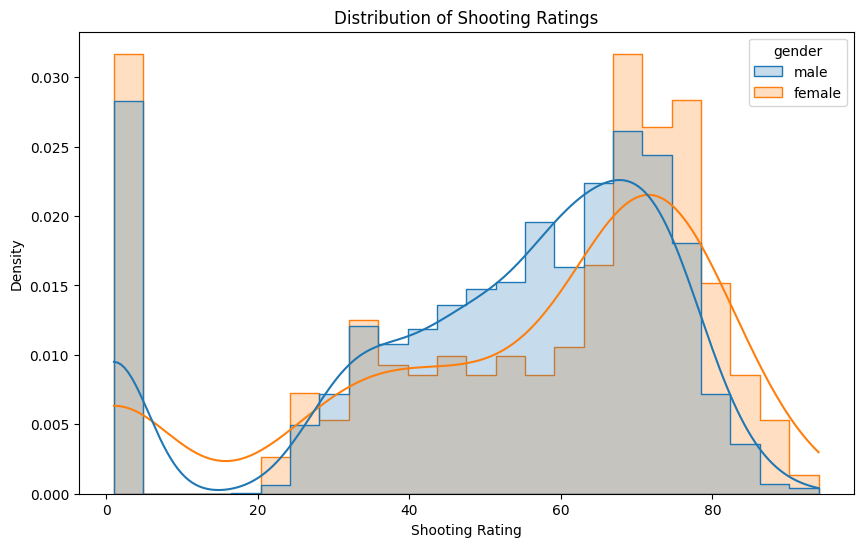

In [ ]:
# distribution for shooting
plt.figure(figsize=(10, 6))
sns.histplot(data=df_fifa, x='shooting', hue='gender', kde=True, element='step', stat="density", common_norm=False)
plt.title('Distribution of Shooting Ratings')
plt.xlabel('Shooting Rating')
plt.ylabel('Density')
plt.show()

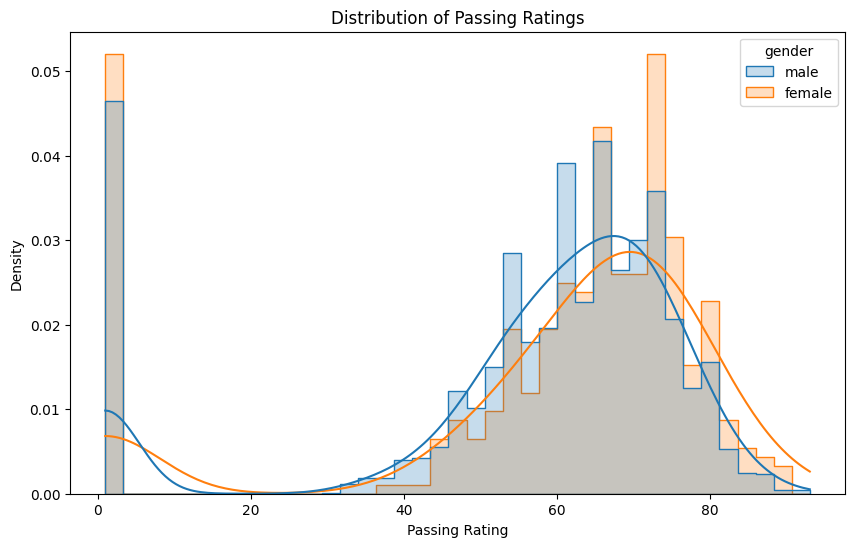

In [ ]:
# distribution for passing
plt.figure(figsize=(10, 6))
sns.histplot(data=df_fifa, x='passing', hue='gender', kde=True, element='step', stat="density", common_norm=False)
plt.title('Distribution of Passing Ratings')
plt.xlabel('Passing Rating')
plt.ylabel('Density')
plt.show()

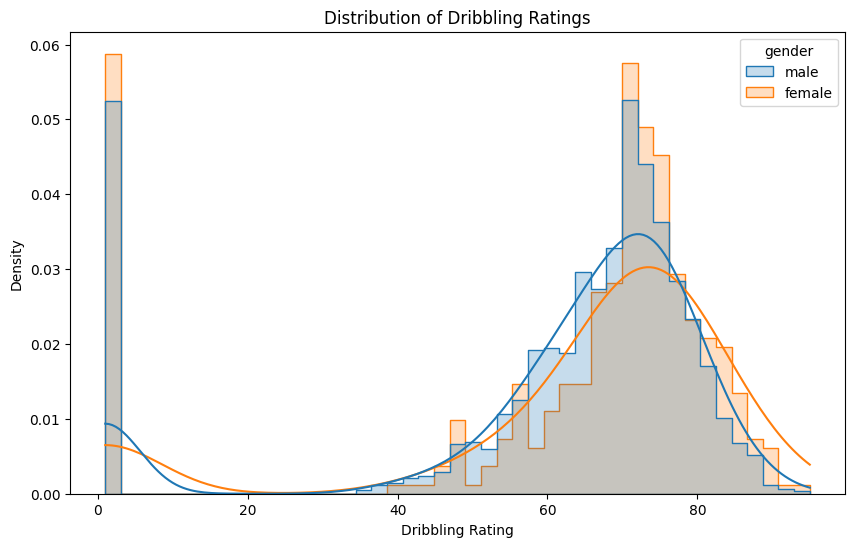

In [ ]:
# distribution for dribbling
plt.figure(figsize=(10, 6))
sns.histplot(data=df_fifa, x='dribbling', hue='gender', kde=True, element='step', stat="density", common_norm=False)
plt.title('Distribution of Dribbling Ratings')
plt.xlabel('Dribbling Rating')
plt.ylabel('Density')
plt.show()

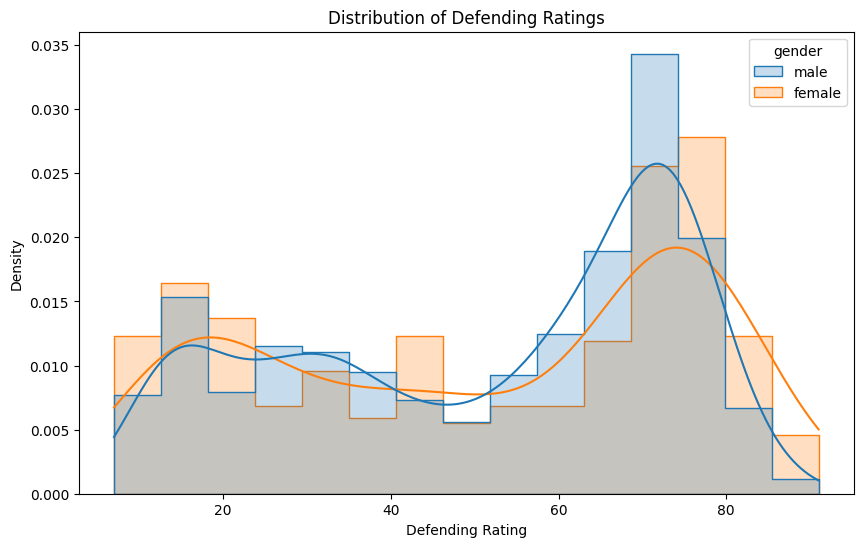

In [ ]:
# distribution for defending
plt.figure(figsize=(10, 6))
sns.histplot(data=df_fifa, x='defending', hue='gender', kde=True, element='step', stat="density", common_norm=False)
plt.title('Distribution of Defending Ratings')
plt.xlabel('Defending Rating')
plt.ylabel('Density')
plt.show()

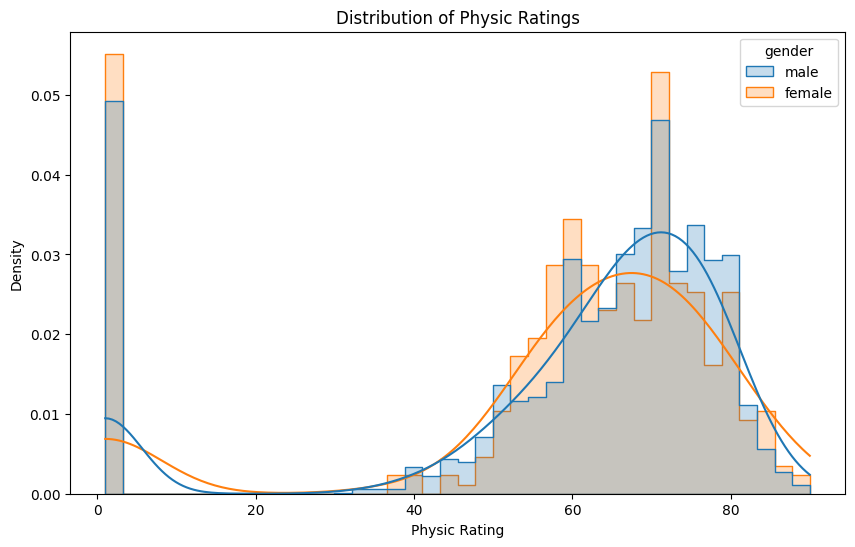

In [ ]:
# distribution for physic
plt.figure(figsize=(10, 6))
sns.histplot(data=df_fifa, x='physic', hue='gender', kde=True, element='step', stat="density", common_norm=False)
plt.title('Distribution of Physic Ratings')
plt.xlabel('Physic Rating')
plt.ylabel('Density')
plt.show()

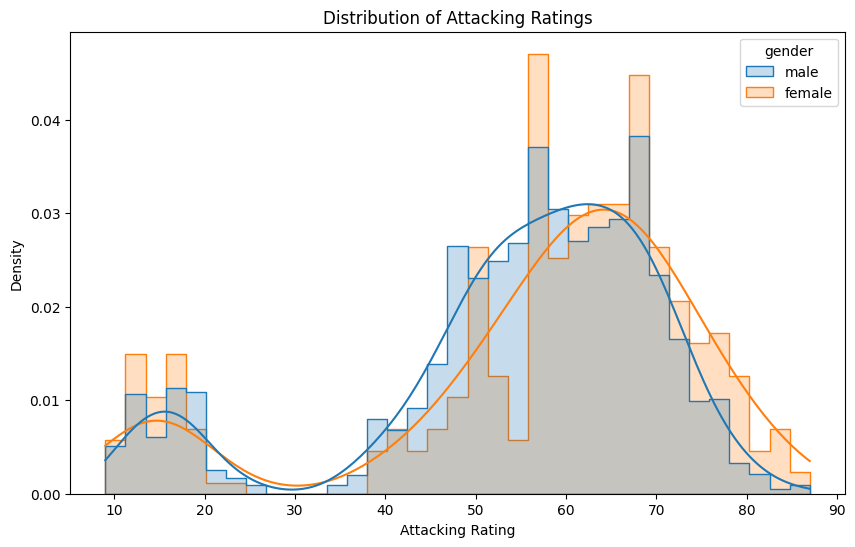

In [ ]:
# distribution for attacking
plt.figure(figsize=(10, 6))
sns.histplot(data=df_fifa, x='attacking', hue='gender', kde=True, element='step', stat="density", common_norm=False)
plt.title('Distribution of Attacking Ratings')
plt.xlabel('Attacking Rating')
plt.ylabel('Density')
plt.show()

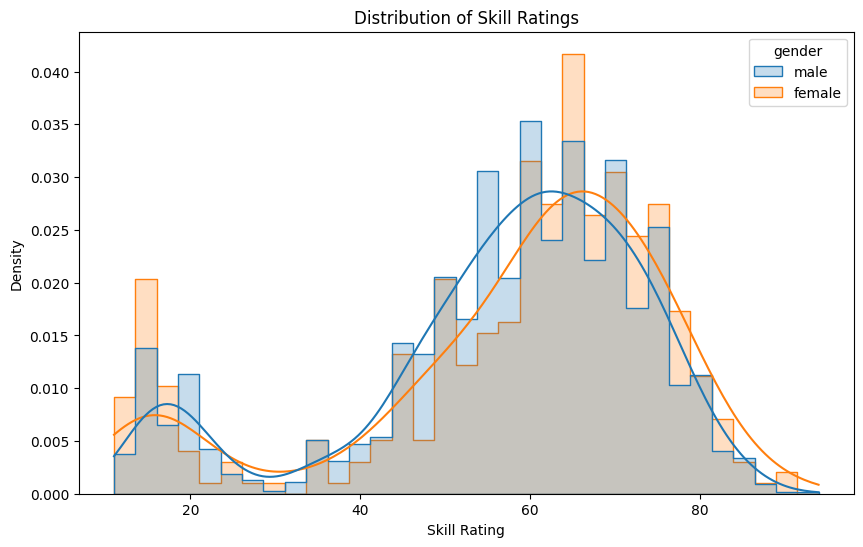

In [ ]:
# distribution for skill
plt.figure(figsize=(10, 6))
sns.histplot(data=df_fifa, x='skill', hue='gender', kde=True, element='step', stat="density", common_norm=False)
plt.title('Distribution of Skill Ratings')
plt.xlabel('Skill Rating')
plt.ylabel('Density')
plt.show()

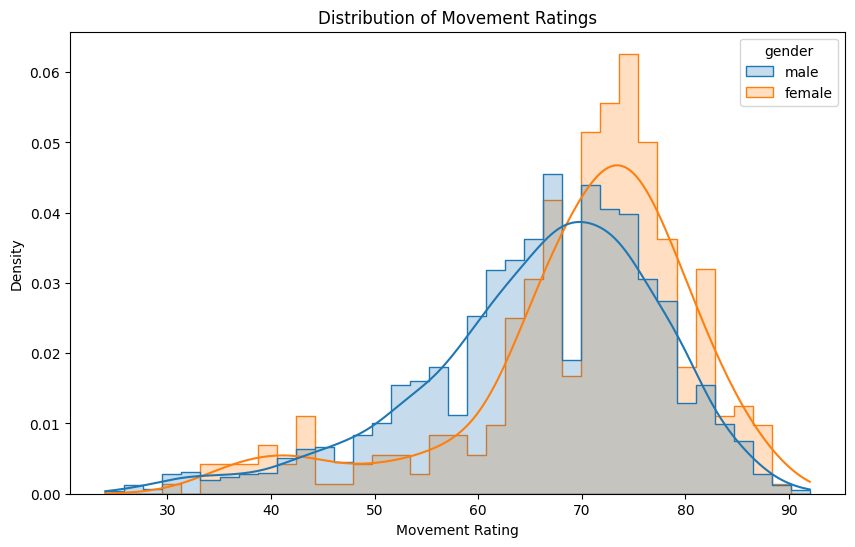

In [ ]:
# distribution for movement
plt.figure(figsize=(10, 6))
sns.histplot(data=df_fifa, x='movement', hue='gender', kde=True, element='step', stat="density", common_norm=False)
plt.title('Distribution of Movement Ratings')
plt.xlabel('Movement Rating')
plt.ylabel('Density')
plt.show()

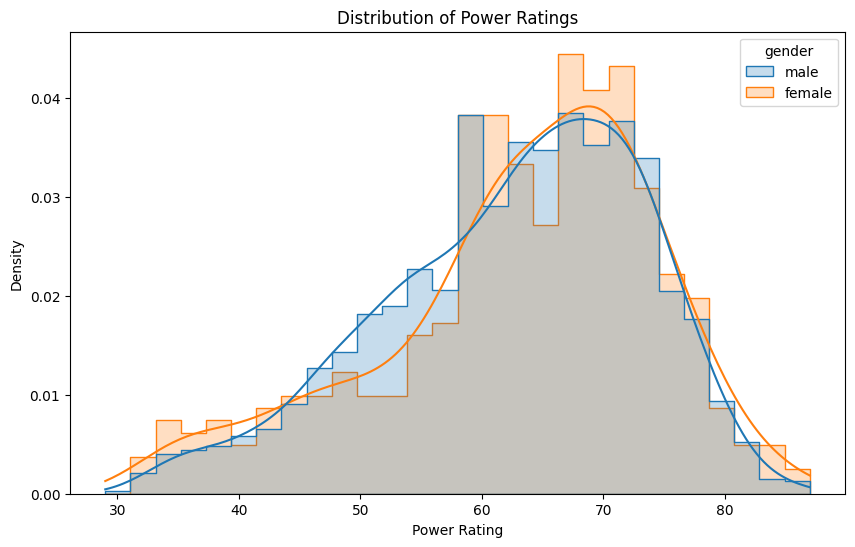

In [ ]:
# distribution for power
plt.figure(figsize=(10, 6))
sns.histplot(data=df_fifa, x='power', hue='gender', kde=True, element='step', stat="density", common_norm=False)
plt.title('Distribution of Power Ratings')
plt.xlabel('Power Rating')
plt.ylabel('Density')
plt.show()

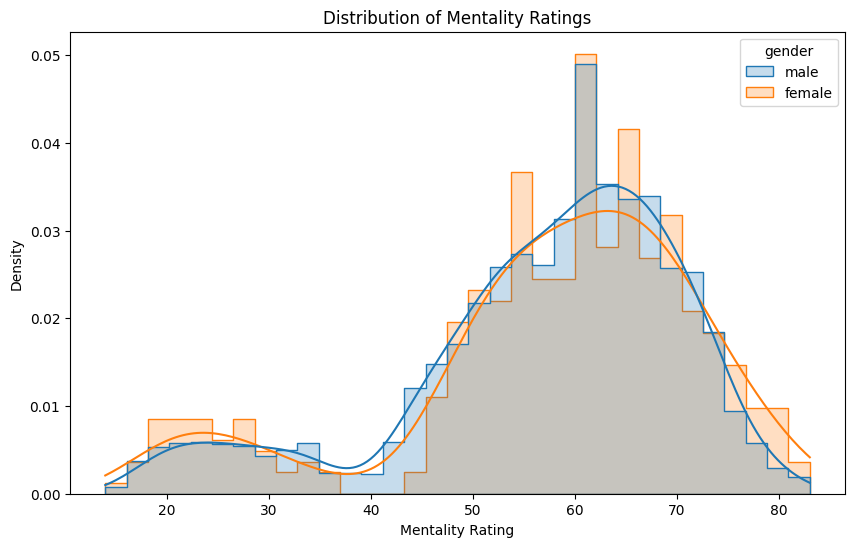

In [ ]:
# distribution for mentality
plt.figure(figsize=(10, 6))
sns.histplot(data=df_fifa, x='mentality', hue='gender', kde=True, element='step', stat="density", common_norm=False)
plt.title('Distribution of Mentality Ratings')
plt.xlabel('Mentality Rating')
plt.ylabel('Density')
plt.show()

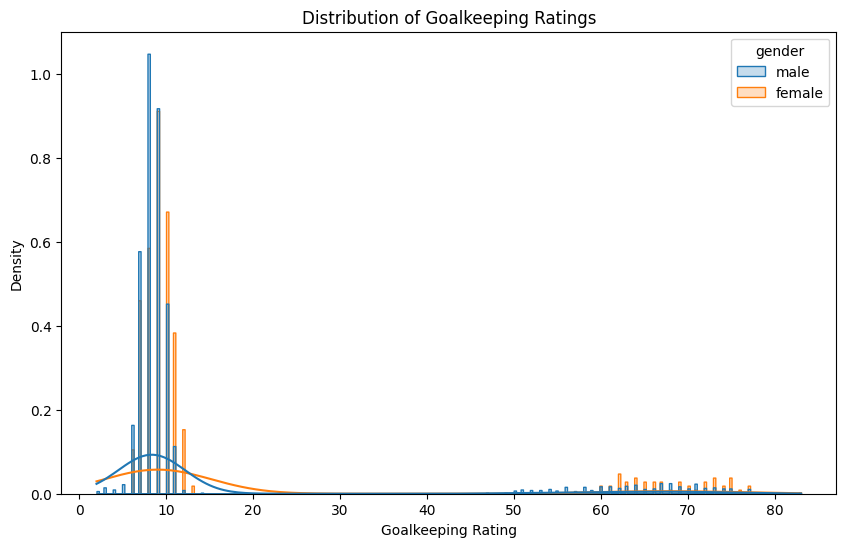

In [ ]:
# distribution for goalkeeping
plt.figure(figsize=(10, 6))
sns.histplot(data=df_fifa, x='goalkeeping', hue='gender', kde=True, element='step', stat="density", common_norm=False)
plt.title('Distribution of Goalkeeping Ratings')
plt.xlabel('Goalkeeping Rating')
plt.ylabel('Density')
plt.show()

## Data Modelling

In [ ]:
# loading the saved and cleaned dataset:
path_to_fifa_dataset = '/content/drive/My Drive/UZH/IVDA/df_fifa.csv'
df_fifa = pd.read_csv(path_to_fifa_dataset)

# checking the first few rows of the datasets
print("FIFA Dataset:")
print(df_fifa.head(3))


FIFA Dataset:
   sofifa_id                                         player_url  \
0     158023  https://sofifa.com/player/158023/lionel-messi/...   
1     188545  https://sofifa.com/player/188545/robert-lewand...   
2      20801  https://sofifa.com/player/20801/c-ronaldo-dos-...   

          short_name player_positions  overall  age gender nationality_name  \
0           L. Messi       RW, ST, CF       93   34   male        Argentina   
1     R. Lewandowski               ST       92   32   male           Poland   
2  Cristiano Ronaldo           ST, LW       91   36   male         Portugal   

   pace  shooting  ...  defending  physic  \
0  85.0      92.0  ...         26    65.0   
1  78.0      92.0  ...         32    82.0   
2  87.0      94.0  ...         26    75.0   

                                     player_face_url  \
0  https://cdn.sofifa.net/players/158/023/22_120.png   
1  https://cdn.sofifa.net/players/188/545/22_120.png   
2  https://cdn.sofifa.net/players/020/801/22_120.pn

### KMeans

We want to explore whether players of any specific position, such as strikers, can be grouped into distinct clusters based on their player attributes. This could possibly help fifa coaches swap out injured players or help for future team building recommendations.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
<ipython-input-8-8b307413804e>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_strikers.loc[:, 'cluster'] = clusters


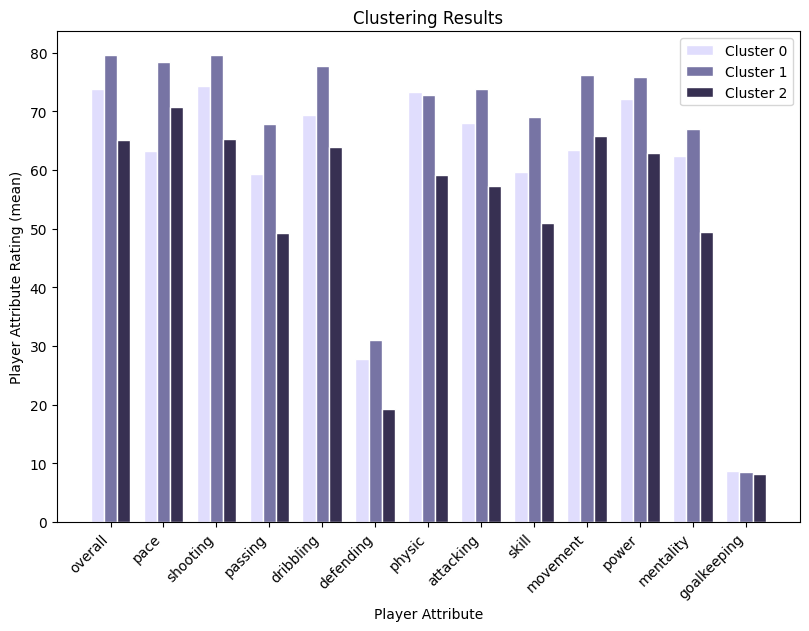

In [ ]:
from sklearn.cluster import KMeans

df_copy = df_fifa.copy()

# filter for a specific player position, in our example we look at pure Strikers
df_strikers = df_copy[df_copy['player_positions'] == 'ST']

# taking all player attributes for clustering
player_attributes = ['overall', 'pace', 'shooting', 'passing',
    'dribbling', 'defending', 'physic', 'attacking',
    'skill', 'movement', 'power', 'mentality', 'goalkeeping']
X = df_strikers[player_attributes]

# k-means clustering
kmeans = KMeans(n_clusters=3)
clusters = kmeans.fit_predict(X)

# add cluster column back to df
df_strikers.loc[:, 'cluster'] = clusters

# group the data and get the mean values
grouped = df_strikers.groupby('cluster').mean(numeric_only=True).reset_index()

# list of the player attributes
labels = ['overall', 'pace', 'shooting', 'passing',
    'dribbling', 'defending', 'physic', 'attacking',
    'skill', 'movement', 'power', 'mentality', 'goalkeeping']

# variables for the visualization
n_clusters = 3
bar_width = 0.25
question_columns = X.columns.tolist()
r = np.arange(len(labels))
colors = ['#E0DDFD', '#7774A4', '#373052']

fig, ax = plt.subplots(figsize=(8, 6))

# plotting the bars for each cluster
for index, row in grouped.iterrows():
    values = row[question_columns].tolist()
    positions = [x + index*bar_width for x in r]
    ax.bar(positions, values, color=colors[index], width=bar_width, edgecolor='white', label=f'Cluster {index}')

# add the real question instead of the subquestion string
ax.set_xticks([r + bar_width for r in range(len(labels))])
ax.set_xticklabels(labels, rotation=45, ha="right")

# plot
ax.legend()
plt.tight_layout()
plt.title('Clustering Results')
plt.xlabel('Player Attribute')
plt.ylabel('Player Attribute Rating (mean)')
plt.show()



The provided bar chart displays the results of clustering pure strikers based on their player attributes into three distinct groups. The clusters can be interpreted as follows:

* Cluster 0: This group represents strikers with average ratings across most attributes, positioning them as the middle tier in terms of performance, since they almost always have a rating between the other two clusters.

* Cluster 1: The strikers in this cluster tend to have the highest ratings, suggesting that they are the top performing strikers based on ratings.

* Cluster 2: Players in this cluster generally have the lowest attribute ratings.

An interesting pattern emerges when considering specific physical attributes such as pace, physic, and movement. Unlike the other attributes, the observed pattern in these physical attributes does not align with the overall trend of cluster rankings. For pace, physic, and movement, the rankings are not in the order one might expect based on the other attributes, like the best strikers do not necessarily have the best pace.

The same as for the physical attribtues also goes for the goalkeeping. Since it is not a relevant attribute for strikers, its ratings can be disregarded in this analysis. This discrepancy in physical attributes versus skill attributes could be a topic of further investigation.

### NearestNeighbors

A second approach would be to find similar players for recommendations based on their player attributes with the nearestneighbors model.

Top 5 similar players close to L. Messi :
3               Neymar Jr
41              P. Dybala
2989           L. Martens
2       Cristiano Ronaldo
2997            K. Little
Name: short_name, dtype: object


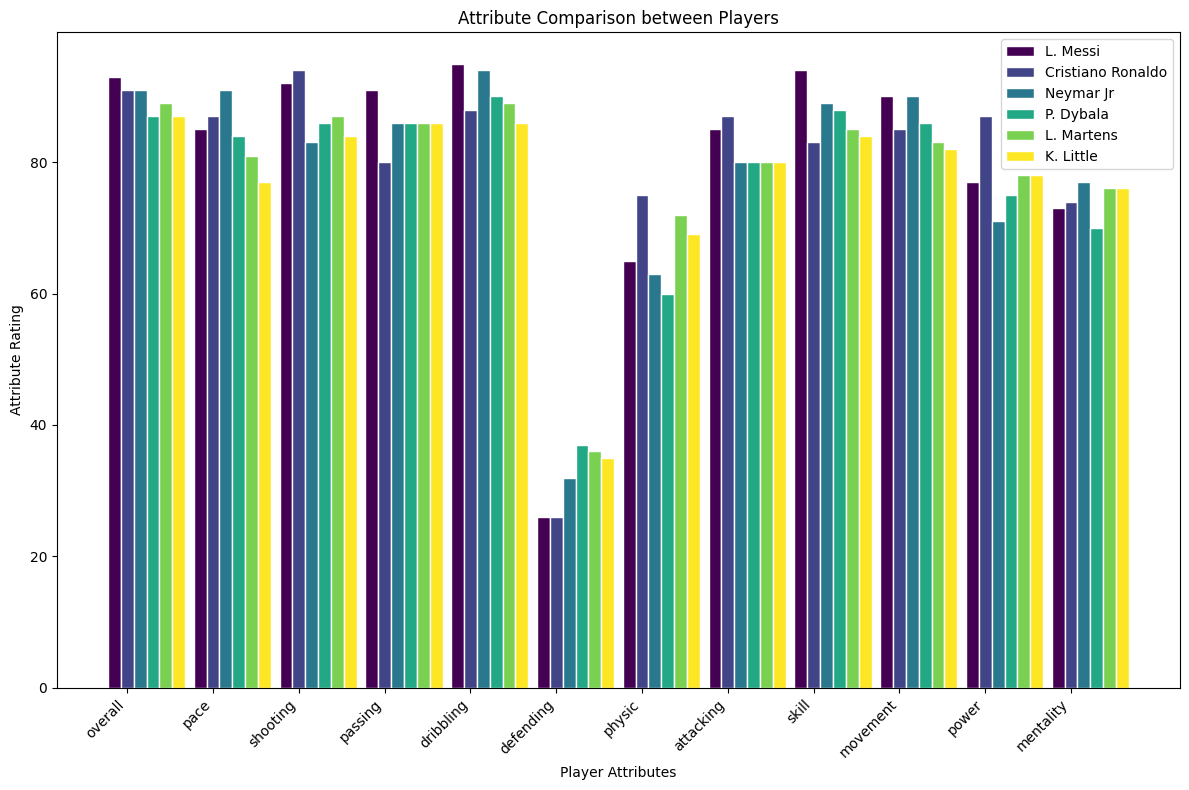

In [ ]:
from sklearn.neighbors import NearestNeighbors

# nr of neighbors to return
number_of_neighbors = 6

# create and fit the model
nn = NearestNeighbors(n_neighbors=number_of_neighbors, algorithm='ball_tree')
#nn.fit(X)

def find_similar_players(player_name, df, model, player_attributes):
    # check for spelling mistake
    if player_name not in df['short_name'].values:
        print(f"Player {player_name} not found.")
        return []

    # the players attributes
    player = df[df['short_name'] == player_name][player_attributes]

    # nearest neighbors for these attributes
    distances, indices = model.kneighbors(player)

    # exclude the input players index
    indices = indices[0]
    if df.iloc[indices[0]]['short_name'] == player_name:
        indices = indices[1:]

    # get the names of the similar players
    similar_players = df.iloc[indices]['short_name']

    return similar_players.head(number_of_neighbors - 1)

# player attributes for field players (without goalkeeping):
outfield_player_attributes = ['overall', 'pace', 'shooting', 'passing',
                              'dribbling', 'defending', 'physic', 'attacking',
                              'skill', 'movement', 'power', 'mentality']

# fit the model
nn.fit(df_fifa[outfield_player_attributes])

# test it
player_name = "L. Messi"
similar_players = find_similar_players(player_name, df_fifa, nn, outfield_player_attributes)
print("Top 5 similar players close to " + player_name + " :")
print(similar_players)

# visualize the results
similar_players_with_input = [player_name] + similar_players.tolist()

# get a df with only those players (input and similar ones)
comparison_df = df_fifa[df_fifa['short_name'].isin(similar_players_with_input)]

# variables for the visualization
player_names = comparison_df['short_name'].tolist()
attributes = outfield_player_attributes
colors = plt.cm.viridis(np.linspace(0, 1, len(player_names)))

# plotting
fig, ax = plt.subplots(figsize=(12, 8))
bar_width = 0.15
r = np.arange(len(attributes))

# plotting the bars for each player
for i, player in enumerate(player_names):
    values = comparison_df[comparison_df['short_name'] == player][attributes].iloc[0].tolist()
    positions = [x + i*bar_width for x in r]
    ax.bar(positions, values, color=colors[i], width=bar_width, edgecolor='white', label=player)

# labelling
ax.set_xticks([r + bar_width for r in range(len(attributes))])
ax.set_xticklabels(attributes, rotation=45, ha="right")
ax.legend()
plt.title('Attribute Comparison between Players')
plt.xlabel('Player Attributes')
plt.ylabel('Attribute Rating')
plt.tight_layout()
plt.show()


As we can see for the player L. Messi, it displays his 5 closest neighbours and they seem to make sense intuitively for a person that watches football sometimes, but they also make sense when looking at the different player attributes which are mostly in the same range. So this could be helpful as well for player swap recommendations. And might be the recommendation approach we choose for our tool, since the results directly contain player names that can be used, and also the results are easily understandable with visualizations of the player attribute ratings.